# Statistiken zur Sprachebene der deutschen Lyrics

In diesem Jupyter Notebook haben wir uns hauptsächlich auf den sprachlichen Stil der deutschen Lyrics beschäfigt. Damit ist gemeint, dass sich die Lyrics genauer angeschaut und auf Auffälligkeiten analysiert wurden. Unterteilt ist das Jupyter Notebook in folgende Unterthemen:

- Worthäufigkeiten
  - allgemein
  - Konotation
  - Standorte
- Vielfältigkeit
- Grammatikalische Korrektheit

### Setup

In [1]:
import pandas as pd
from collections import Counter
import spacy
import spacy.cli
from spacy.tokens import Doc
# spacy.cli.download("de_core_news_lg")
# spacy.cli.download("de_core_news_md")
from spacy.language import Language
from spacy_language_detection import LanguageDetector
import pytextrank


c:\Users\lotus\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("../data/songs_complete_final.csv")

In [3]:
nlp = spacy.load("de_core_news_md")

In [4]:
df

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count
0,1099,209826,10999,831505,2021-10-29,INTRO (10999),INTRO (10999) by King Khalil,7337100,"Powpow Dicka, das kein Rap mehr, das ist Kind...",2021,Friday,post-rock,Rock,60
1,1099,209826,10999,831505,2021-10-29,GIB IHM,GIB IHM by King Khalil & AK 33,7337102,"Gefährliche, gefährliche KiKiKiKi Gefährliche ...",2021,Friday,post-rock,Rock,92
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80
4,1099,209826,KING KONG,546439,2020-01-31,MOON,MOON by King Khalil & Lil Lano,5109178,. Liquid Swords GZA Actual . souljaboytellem...,2020,Friday,post-rock,Rock,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80
17750,t-low,9229,Tyskie (EP),553779,2019-08-02,Fast,Fast by ​​t-low,4782369,"Kozee, cooke die Sauce Ich bin fast fully tat...",2019,Friday,hip-hop,Rap,98
17751,t-low,9229,Tyskie (EP),553779,2019-08-02,Fliegt,Fliegt by ​​t-low (Ft. Murcy),4784534,"Rope God, youre so anorexic Und sie fliegt ja...",2019,Friday,hip-hop,Rap,90
17752,t-low,9229,Tyskie (EP),553779,2019-08-02,Lonely,Lonely by ​​t-low,4784567,"Sie ist lonely, Ja Sie will nur zu ihrem Homi...",2019,Friday,hip-hop,Rap,60


In [5]:
# Tokenisieren und Zählen der Wörter
df['lyrics'] = df['lyrics'].apply(lambda x: len([token.text for token in nlp(x)]))

In [23]:
df

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count
0,1099,209826,10999,831505,2021-10-29,INTRO (10999),INTRO (10999) by King Khalil,7337100,144,2021,Friday,post-rock,Rock,60
1,1099,209826,10999,831505,2021-10-29,GIB IHM,GIB IHM by King Khalil & AK 33,7337102,217,2021,Friday,post-rock,Rock,92
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,274,2020,Friday,post-rock,Rock,113
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,99,2020,Friday,post-rock,Rock,80
4,1099,209826,KING KONG,546439,2020-01-31,MOON,MOON by King Khalil & Lil Lano,5109178,408,2020,Friday,post-rock,Rock,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,267,2019,Friday,hip-hop,Rap,80
17750,t-low,9229,Tyskie (EP),553779,2019-08-02,Fast,Fast by ​​t-low,4782369,262,2019,Friday,hip-hop,Rap,98
17751,t-low,9229,Tyskie (EP),553779,2019-08-02,Fliegt,Fliegt by ​​t-low (Ft. Murcy),4784534,331,2019,Friday,hip-hop,Rap,90
17752,t-low,9229,Tyskie (EP),553779,2019-08-02,Lonely,Lonely by ​​t-low,4784567,228,2019,Friday,hip-hop,Rap,60


In [6]:
# Ausgeben der einzelnen Genres
df.value_counts('genre')

genre
deutschrap      4033
pop             2560
rap             2395
schlager        1343
hip-hop         1271
hip hop         1256
rock             663
indie            632
deutschrock      416
punk rock        390
reggae           264
ambient          222
[]               214
karneval         201
electro          162
deutsch rap      130
instrumental     119
gothic           117
emo              109
cloud rap         69
swing             66
new wave          64
ndw               53
pop rock          53
post-rock         49
party             41
pornorap          27
dubstep           12
metal              5
dtype: int64

### Worthäufigkeiten

hier wird nachgeschaut wie lang die Lyrics pro genre sind.

In [40]:
# genres gruppieren
df_genre = df.groupby('genre')

# durchschnittliche Lyriclänge pro genre 
avg_lyrics_length = df_genre.mean()['lyrics']

lyrics_length = df_genre.describe()['lyrics']


genre
[]              234.018692
ambient         221.747748
cloud rap       190.231884
deutsch rap     221.453846
deutschrap      238.905033
deutschrock     152.951923
dubstep         254.333333
electro         187.574074
emo             175.412844
gothic          147.290598
hip hop         225.214968
hip-hop         217.366640
indie           162.879747
instrumental    153.159664
karneval        155.353234
metal           120.800000
ndw             159.943396
new wave        149.156250
party           187.170732
pop             168.572656
pop rock        142.075472
pornorap        219.407407
post-rock       248.632653
punk rock       151.056410
rap             221.369102
reggae          182.303030
rock            160.731523
schlager        162.136262
swing           160.893939
Name: lyrics, dtype: float64 


                count        mean         std    min     25%    50%     75%  \
genre                                                                        
[]             214.0  

In [39]:
genres = df['genre'].unique()

for genre in genres:
    # Filterung nach genres
    df_g = df[df['genre'] == genre]
    
    if not df_g.empty:
        # Kürzeste Lyric herausfinden
        shortest_lyric_title = df_g.loc[df_g['lyrics'].idxmin(), 'title']
        shortest_lyric_artist = df_g.loc[df_g['lyrics'].idxmin(), 'artist']
        # Anzahl Wörter
        word_count_short = df_g['lyrics'].min()

        # Längste Lyric herausfinden
        longest_lyric_title = df_g.loc[df_g['lyrics'].idxmax(), 'title']
        longest_lyric_artist = df_g.loc[df_g['lyrics'].idxmax(), 'artist']
        # Anzahl Wörter
        word_count_long = df_g['lyrics'].max()

        print(f"Der kürzeste {genre}-Song ist '{shortest_lyric_title}' von {shortest_lyric_artist} mit insgesamt {word_count_short} Wörtern")
        print(f"Der längste {genre}-Song ist '{longest_lyric_title}' von {longest_lyric_artist} mit insgesamt {word_count_long} Wörtern\n")



Der kürzeste post-rock-Song ist 'Moshpit' von 1099 mit insgesamt 47 Wörtern
Der längste post-rock-Song ist 'Großstadtschakale' von 1099 mit insgesamt 584 Wörtern

Der kürzeste deutsch rap-Song ist 'KILOWEISE' von 18 Karat mit insgesamt 140 Wörtern
Der längste deutsch rap-Song ist 'Ready to Die' von 18 Karat mit insgesamt 903 Wörtern

Der kürzeste rap-Song ist 'Totentanz' von Die Atzen mit insgesamt 61 Wörtern
Der längste rap-Song ist '100 Bars' von Farid Bang mit insgesamt 950 Wörtern

Der kürzeste pop-Song ist 'Betonblock' von Nena mit insgesamt 69 Wörtern
Der längste pop-Song ist 'In Tyrannis' von Ich + Ich mit insgesamt 1201 Wörtern

Der kürzeste hip hop-Song ist 'Er-sagt-Sie-sagt' von Max Herre mit insgesamt 84 Wörtern
Der längste hip hop-Song ist 'Die Unendlichste Geschichte (Kapitel 1)' von SDP mit insgesamt 1091 Wörtern

Der kürzeste schlager-Song ist 'Keine Panik' von Michael Wendler mit insgesamt 53 Wörtern
Der längste schlager-Song ist 'Der “Nie genug” Hitmix' von Wolfgang Pe

In [185]:
pd.options.plotting.backend = "plotly"

# Darstellung durchschnittliche Wortlänge
lyric_fig = avg_lyrics_length.plot(kind='bar', title='Durchschnittliche Wörtlänge für jedes Genre')
lyric_fig.show()

# speichern als HTML
lyric_fig.write_html("../images/avg_lyric.html")

Wie man anhand der Ergebnisse erkennen kann, so unterscheidet sich die Länge der Lyrics zwischen den Genre deutlich. Hip-hop hat mit 21 Wörten sowohl den kürzesten Lyrictext, als für das selbe Genre unter "hip hop" auch mit 1091 Wörten den längsten Lyric. Wenn man sich jedoch die durchschnittlichen Lyriclängen der jeweiligen Genres anschaut, so befinden sich die beiden Genres doch im mittleren Bereich. Durchschnittlich hat das Genre dubstep die längste Lyriclänge, währen metal die kürzeste Länge hat. Diese Ergebnisse waren aus unserer sicht sehr überraschend, da Dupstep für die Beats als die eigentlichen Songtexte bekannt ist. Ein möglicher Grund ist könnte an wenigen Werten im Datenset liegen, da dubstep mit 12 Songs und 5 Songs in metal nicht wirklich aussagekräftig für die Ergebnisse sind. 

#### Wie unterscheiden sich die Wortschätze von Pop und Rap voneinander?

Da die Genres Rap und Pop als ziemliche Gegensätze gesehen werden, haben wir sie in diesem Jupyter Notebook manchmal gegenübergestellt. Als Erstes schauen wir uns genauer an was für Nomen in den Lyrics aufkommen und ob diese sich stark voneinander unterscheiden und später wird noch die Sentimentsanalyse mit eingebracht. 

In [43]:
df = pd.read_csv("../data/songs_complete_final.csv")

In [48]:
pop_df = df[df['genre_cat'] == 'Pop']
rap_df = df[df['genre_cat'] == 'Rap']

In [71]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

# counter() zur Zählung der Nomen
pop_song_word_count = Counter()
rap_song_word_count = Counter()

for lyrics in pop_df["lyrics"]:
    doc = nlp(lyrics)
    song_words = set()
    for token in doc:
        if token.pos_ == 'NOUN':
            song_words.add(token.text)
    # Zählen der Nomen pro Songs
    for word in song_words:
        pop_song_word_count[word] += 1

for lyrics in rap_df["lyrics"]:
    doc = nlp(lyrics)
    song_words = set()
    for token in doc:
        if token.pos_ == 'NOUN':
            song_words.add(token.text)
    # Zählen der Nomen pro Songs
    for word in song_words:
        rap_song_word_count[word] += 1

# häufigst auftauchende Nomen für Pop und Rap
pop_common_nouns = pop_song_word_count.most_common(15)
rap_common_nouns = rap_song_word_count.most_common(15)

[('Zeit', 636), ('Leben', 595), ('Welt', 562), ('Tag', 500), ('Nacht', 474), ('Herz', 421), ('Liebe', 410), ('Augen', 340), ('Kopf', 314), ('Weg', 280), ('Hab', 268), ('Hand', 248), ('Licht', 248), ('Glück', 238), ('Mann', 237)]


In [73]:
print(pop_common_nouns)
print(rap_common_nouns)

[('Zeit', 636), ('Leben', 595), ('Welt', 562), ('Tag', 500), ('Nacht', 474), ('Herz', 421), ('Liebe', 410), ('Augen', 340), ('Kopf', 314), ('Weg', 280), ('Hab', 268), ('Hand', 248), ('Licht', 248), ('Glück', 238), ('Mann', 237)]
[('Leben', 2185), ('Zeit', 1741), ('Tag', 1667), ('Welt', 1566), ('Geld', 1551), ('Mann', 1395), ('Kopf', 1391), ('Nacht', 1249), ('Rapper', 1113), ('Weg', 1013), ('Augen', 958), ('Leute', 867), ('Rap', 842), ('Stadt', 833), ('Herz', 830)]


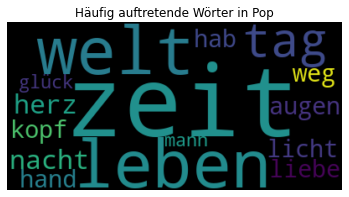

In [188]:
pop_nouns_text = ' '.join([noun for noun, count in pop_common_nouns]).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(pop_nouns_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Häufig auftretende Wörter in Pop")
plt.axis("off")
plt.show()

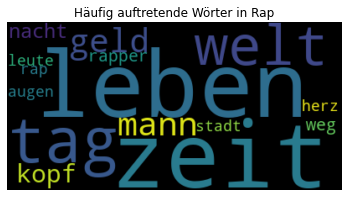

In [189]:
rap_nouns_text = ' '.join([noun for noun, count in rap_common_nouns]).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(rap_nouns_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Häufig auftretende Wörter in Rap")
plt.axis("off")
plt.show()

Die Resultate zeigen, dass beide Genres doch ähnliche Themen beinhalten. Beide Genres beinhalten am meitsen die Themen Leben, Zeit, Tag und Welt. Man erkennt jedoch für das Genre Pop beispielsweise, dass einige positive Begriffe wie Liebe, Licht oder Glück häufigeer verwendet werden, während es bei Rap Geld, Rapper oder Stadt die Themen häufiger erscheinen. 

### Konotation

#### Welches Genre ist am ausdrucksvollsten?

Damit man erfährt, wie ausdrucksvoll eigentlich die Genres jeweils sind, wurde im folgenden Teil die einzelnen Konnotaionen der Genres analysiert und Visualisiert. Für die Analyse wurde eine Sentimentanalyse mit "positiv" und "negativ" mithilfe von spacy erstellt, in der man an anfang nach den positiven und negativen Wörtern gefiltert hat, die Häufigkeiten dieser visualisiiert und anschließend für die Genre Rap und Pop miteinander verglichen hat. 

In [130]:
# !pip install spacy_sentiws
# https://spacy.io/universe/project/spacy-sentiws
# https://spacy.io/universe/project/spacy-textblob

In [134]:
# anwendung von spacy_sentiws zur Sentimentanalyse
from spacy_sentiws import spaCySentiWS
sentiws_path = '../data/sentiws'
nlp.add_pipe("sentiws", config={"sentiws_path": sentiws_path})

In [135]:
df['positive_words'] = ''
df['negative_words'] = ''

for idx, row in df.iterrows():
    text = row['lyrics']
    positive_words = []
    negative_words = []
    doc = nlp(text)
    for token in doc:
        sentiment = token._.sentiws
        # Überprüfung auf sentiment 
        if isinstance(sentiment, float):
            # positives sentiment
            if sentiment > 0:
                positive_words.append(token.text)
            # negatives sentiment
            elif sentiment < 0:
                negative_words.append(token.text)
    # Verbindung positiver und negativer Wörter als string in df-Spalte
    df.at[idx, 'positive_words'] = ', '.join(set(positive_words))
    df.at[idx, 'negative_words'] = ', '.join(set(negative_words))

In [136]:
df

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count,positive_words,negative_words
0,1099,209826,10999,831505,2021-10-29,INTRO (10999),INTRO (10999) by King Khalil,7337100,"Powpow Dicka, das kein Rap mehr, das ist Kind...",2021,Friday,post-rock,Rock,60,"gute, Heiße",verschwinde
1,1099,209826,10999,831505,2021-10-29,GIB IHM,GIB IHM by King Khalil & AK 33,7337102,"Gefährliche, gefährliche KiKiKiKi Gefährliche ...",2021,Friday,post-rock,Rock,92,"richtigen, Jubel, Erfolg, Lohn, bedeutet","Feuer, Idiot, kämpfe, droht, gefährliche, Gefä..."
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113,"guten, geschenkt, schöne, lieb, Leidenschaft","Chaos, Gewalt, gelitten, verlierst, gekämpft, ..."
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80,,
4,1099,209826,KING KONG,546439,2020-01-31,MOON,MOON by King Khalil & Lil Lano,5109178,. Liquid Swords GZA Actual . souljaboytellem...,2020,Friday,post-rock,Rock,233,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80,"Liebe, verdient","Tod, kurzen, scheiße"
17750,t-low,9229,Tyskie (EP),553779,2019-08-02,Fast,Fast by ​​t-low,4782369,"Kozee, cooke die Sauce Ich bin fast fully tat...",2019,Friday,hip-hop,Rap,98,verdient,
17751,t-low,9229,Tyskie (EP),553779,2019-08-02,Fliegt,Fliegt by ​​t-low (Ft. Murcy),4784534,"Rope God, youre so anorexic Und sie fliegt ja...",2019,Friday,hip-hop,Rap,90,Liebe,"Leid, weint"
17752,t-low,9229,Tyskie (EP),553779,2019-08-02,Lonely,Lonely by ​​t-low,4784567,"Sie ist lonely, Ja Sie will nur zu ihrem Homi...",2019,Friday,hip-hop,Rap,60,,schlag


[('liebe', 1113), ('glück', 501), ('freunde', 411), ('freund', 390), ('neue', 351), ('macht', 280), ('gute', 271), ('große', 270), ('ziel', 266), ('sinn', 248), ('kraft', 228), ('hoffnung', 195), ('erfolg', 186), ('großen', 181), ('spaß', 175)]


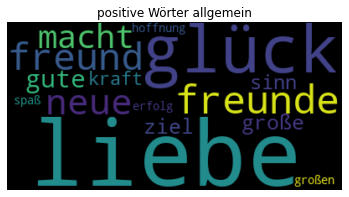

In [197]:
# allgemeine wordcloud aus positiven Wörtern der neuen spalte
positive_words = ' '.join([word.lower() for word in df['positive_words']])
positive_word_list = positive_words.split(', ')

positive_word_count = Counter(positive_word_list)
most_common_positive_words = positive_word_count.most_common(15)
# print(most_common_positive_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_positive_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("positive Wörter allgemein")
plt.axis('off')
plt.show()

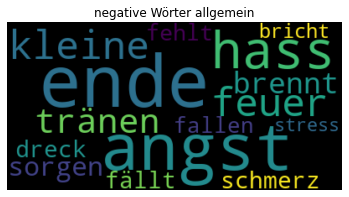

In [198]:
# allgemeine wordcloud aus negativen Wörtern der neuen spalte
negative_words = ' '.join([word.lower() for word in df['negative_words']])
negative_words_list = negative_words.split(', ')

negative_word_count = Counter(negative_words_list)
most_common_negative_words = negative_word_count.most_common(15)
# print(most_common_negative_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_negative_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("negative Wörter allgemein")
plt.axis('off')
plt.show()

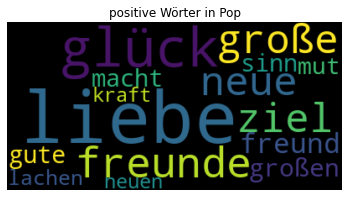

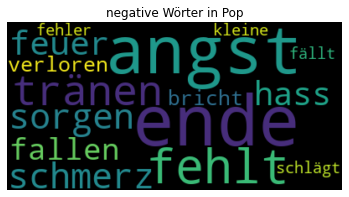

In [166]:
# positive Wörter für das genre Pop
pop_positive_words = ' '.join([word.lower() for word in df[df['genre_cat'] == 'Pop']['positive_words']])

# splitten in einzelne Wörter
pop_positive_word_list = pop_positive_words.split(', ')

pop_positive_word_count = Counter(pop_positive_word_list)
most_common_pop_positive_words = pop_positive_word_count.most_common(15)
# print(most_common_pop_positive_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_pop_positive_words))

# negative Wörter für das genre Pop
pop_negative_words = ' '.join([word.lower() for word in df[df['genre_cat'] == 'Pop']['negative_words']])

pop_negative_word_list = pop_negative_words.split(', ')

pop_negative_word_count = Counter(pop_negative_word_list)
most_common_pop_negative_words = pop_negative_word_count.most_common(15)
# print(most_common_pop_negative_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_pop_negative_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("positive Wörter in Pop")
plt.show()

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("negative Wörter in Pop")
plt.show()

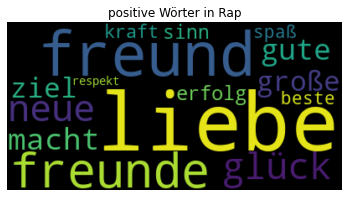

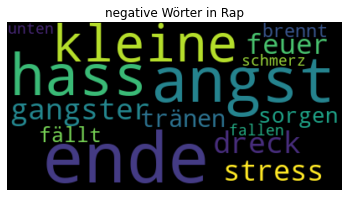

In [199]:
# positive Wörter für das genre Rap
rap_positive_words = ' '.join([word.lower() for word in df[df['genre_cat'] == 'Rap']['positive_words']])

rap_positive_word_list = rap_positive_words.split(', ')

rap_positive_word_count = Counter(rap_positive_word_list)
most_common_rap_positive_words = rap_positive_word_count.most_common(15)
# print(most_common_rap_positive_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_rap_positive_words))

# negative Wörter für das genre Rap
rap_negative_words = ' '.join([word.lower() for word in df[df['genre_cat'] == 'Rap']['negative_words']])

rap_negative_word_list = rap_negative_words.split(', ')

rap_negative_word_count = Counter(rap_negative_word_list)
most_common_rap_negative_words = rap_negative_word_count.most_common(15)
# print(most_common_rap_negative_words)

wordcloud = WordCloud(prefer_horizontal=2).generate_from_frequencies(dict(most_common_rap_negative_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("positive Wörter in Rap")
plt.show()

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("negative Wörter in Rap")
plt.show()

Die Analyse legt nahe, dass die meisten Themen im kompletten Datensset in Hinblick auf die Genres doch einigermaßen gleich sind. Während Liebe, Freundschaft und Glück als positive Wörter häufig erscheien, so sind die Themen Ende, Angst und HAss doch fürnegative Konotationen sehr gebräuchlich.

In [200]:
word_counts = {}
# 
for word in positive_word_list:
    # wenn Wort in Liste enthalten
    if word in word_counts:
        word_counts[word] += 1
    # wenn Wort zum ersten mal auftritt
    else:
        word_counts[word] = 1

# nur wörter die minimum 100 mal auftreten
filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 100}

# key ist das Wort und Value Anzahl
words = list(filtered_word_counts.keys())
counts = list(filtered_word_counts.values())

fig = go.Figure(data=go.Scatter(
    x=words,
    y=counts,
    mode='markers',
    marker=dict(
        size=counts,
        sizemode='area',
        sizeref=max(counts) / 1000,
        color=counts,
        colorscale='thermal',
        showscale=True
    ),
))

fig.update_layout(
    title='Positive Words Bubble Chart (mindestens 100 Mal auftretende Wörter)',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Counts'),
    showlegend=False
)

fig.show()
fig.write_html("../images/positive_bubble_chart.html")


### Locations

#### Welche Locations werden in den Songtexten genannt?

In [52]:
locations = []
unique_locations = set()
 
for song in df["lyrics"]:
    doc = nlp(song)
    for ent in doc.ents:
        if ent.label_ == "LOC":
            locations.append(ent.text)
        elif ent.label_ == "GPE":
            locations.append(ent.text)


In [76]:
print(len(locations))

41501


Anfangs wurden über pycountry versucht die Standorte herauszufiltern, wobei sehr oft fehlerhafte Ergebnisse herausgeliefert wurden. 

In [79]:
import pycountry

filtered_locations = []
for location in locations:
    try:
        country = pycountry.countries.get(alpha_2=location.upper())
        filtered_locations.append(location)
    except LookupError:
        print(f"{location} is not a valid ISO country code")

print(filtered_locations)

['Dicka', 'Mehringdamm', 'Pac  Werf', 'Weezy', 'Leuchtclips', 'Breslauer', 'UF', 'Streetchabos Ich hab schöne Eier', 'Nenn', 'Erde', 'Stadt', 'Hessens', 'Mond', 'Sehe', 'Texas', 'Hampton Coliseum Live   ', 'kring Som om inget', 'Som om', 'Så ge', 'minns dagarna', 'Park Och', 'och döden', 'allting i sin', 'Reibach', 'Hahaha Woop', 'woop', 'Ey', 'Papa', 'Papa', 'Deutschland', 'Jannidis', 'Stuttgart', 'Tübingen', 'Jannidis', 'Stuttgart', 'Jannidis', 'Stuttgart', 'Lüneburg', 'Berlin', 'Bielefeld', 'Gymnich', 'Trier', 'Frankfurt am Main', 'Hamburg', 'Frankfurt am Main', 'Paderborn', 'Bielefeld', 'Wood', 'TrackAntilopen Gang  ', 'Europas', 'Big Bad BirdsEdgar', 'Ey', 'Sorry', 'Ma', 'Hab', 'Straße', 'SillaCode', 'Chardonnay Chardonnay Hörn', 'Straße gehen  ', 'Stadt', 'zitiern', 'Zеilen', 'lembellisement de la vie', 'lembellisement de la vie', 'HipHopFahne', 'Russland', 'tupac', 'stuttgarter barrios', 'Weil', 'bewahrtn', 'bboys', 'spreadens', 'Juri', 'Straße', 'Pussies nass', 'Tapilanien', 'B

In [82]:
from geotext import GeoText


def is_valid_location(location):
    if GeoText(location).cities:
        places = GeoText(location).cities
        return True


    elif GeoText(location).countries:
        places = GeoText(location).countries
        return True

# locations sind nur dann gültig, wenn diese auch wirklich ein Land oder eine Stadt sind
valid_locations = [location for location in locations if is_valid_location(location) == True]

print(valid_locations)

['Texas', 'Stuttgart', 'Stuttgart', 'Stuttgart', 'Berlin', 'Bielefeld', 'Trier', 'Hamburg', 'Paderborn', 'Bielefeld', 'Mitchell  Ness Weiber', 'Berlin', 'Offenbach am Main', 'Finland', 'Holland', 'Venlo', 'Holland', 'Medellín', 'Medellín', 'Venlo', 'Amsterdam', 'Casablanca', 'Amsterdam', 'Amsterdam', 'China', 'Marbella', 'Amsterdam', 'Rotterdam', 'Hamburg', 'Bolivia', 'Marseille', 'Rotterdam', 'Holland', 'Rotterdam', 'Dortmund', 'Dortmund', 'Hamada', 'Hemşo Ich schmuggel', 'Venlo', 'Ecuador', 'Dortmund', 'Dortmund', 'Amsterdam', 'Rotterdam', 'Dortmund', 'bambambam Dortmund', 'Ghana  ', 'Dortmund', 'Dortmund', 'Dortmund', 'China', 'Dortmund', 'Amsterdam', 'Dortmund', 'Paris Fuck the Police  ', 'Rotterdam', 'Tempelhof', 'Schöneberg', 'Rotterdam', 'Nijmegen', 'Stuttgart', 'Dortmund', 'Heidelberg', 'Straße  Straight Flush Dortmund', 'Berlin', 'Essen', 'Bam', 'badabam Bam', 'Herzogenaurach', 'Holland', 'Paris', 'China', 'Ibiza', 'Holland', 'Holland', 'Holland', 'Ganja', 'Boom', 'Boom', 'Hol

In [83]:
from collections import Counter

valid_locations_dict = dict(Counter(valid_locations))

print(valid_locations_dict)

{'Texas': 8, 'Stuttgart': 29, 'Berlin': 524, 'Bielefeld': 5, 'Trier': 1, 'Hamburg': 142, 'Paderborn': 1, 'Mitchell  Ness Weiber': 1, 'Offenbach am Main': 9, 'Finland': 1, 'Holland': 38, 'Venlo': 10, 'Medellín': 8, 'Amsterdam': 35, 'Casablanca': 5, 'China': 27, 'Marbella': 3, 'Rotterdam': 15, 'Bolivia': 4, 'Marseille': 17, 'Dortmund': 27, 'Hamada': 1, 'Hemşo Ich schmuggel': 1, 'Ecuador': 3, 'bambambam Dortmund': 1, 'Ghana  ': 2, 'Paris Fuck the Police  ': 1, 'Tempelhof': 15, 'Schöneberg': 23, 'Nijmegen': 1, 'Heidelberg': 3, 'Straße  Straight Flush Dortmund': 1, 'Essen': 21, 'Bam': 1, 'badabam Bam': 1, 'Herzogenaurach': 1, 'Paris': 195, 'Ibiza': 23, 'Ganja': 7, 'Boom': 2, 'Wau': 2, 'Iran': 13, 'Schöne dran  Man': 1, 'Moers': 1, 'Baden gehn   Grad': 1, 'Caracas': 1, 'Reeperbahn Hab Hamburg': 1, 'Cottbus': 1, 'Ami': 7, 'Mardin': 8, 'town  Hamburg': 1, 'Norderstedt': 1, 'ansBeinPisser  Wer bistn du': 1, 'Vietnam': 3, 'New York': 79, 'London': 35, 'Meppen': 2, 'Po Mensch Bo  ': 2, 'Bonn': 29

In [86]:
valid_locations_df = pd.DataFrame(list(valid_locations_dict.items()), columns=['Location', 'Count'])

valid_locations_df

,Location,Count
0,Texas,8
1,Stuttgart,29
2,Berlin,524
3,Bielefeld,5
4,Trier,1
...,...,...
823,Delphin Imperial Trump Tower New York,1
824,Paris le Meridien Flaschen,1
825,Zion,2
826,Jericho,1


In [92]:
import plotly.graph_objects as go
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_app")


# höchster Count für vordefinierte valide locations
max_count = max(valid_locations_dict.values())


# Breiten- und Längengrade, Markergrößen und Hover-Texte f+r spätere Kartenerstellung
latitudes = []
longitudes = []
marker_sizes = []
hover_texts = []

for location, count in valid_locations_dict.items():
    try:
        geocode = geolocator.geocode(location)
        if geocode is not None:
            # Extrahieren der Breiten- und Längengrade
            lat = geocode.latitude
            lon = geocode.longitude
            
            # Hinzufügen in Liste oben
            latitudes.append(lat)
            longitudes.append(lon)
            
            marker_size = count / max_count * 50 
            marker_sizes.append(marker_size)
            # Hovertext
            hover_text = f"{location}<br>Count: {count}"
            hover_texts.append(hover_text)
    except:
        pass

location_map = go.Figure(data=go.Scattergeo(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=dict(
        size=marker_sizes,
        color='blue',
        opacity=0.7,
        line=dict(width=0)
    ),
    hovertemplate=hover_texts
))

# Layout der Karte
location_map.update_layout(
    title='Standorte',
    geo=dict(
        resolution=110,
        showland=True,
        landcolor='lightgray',
        showcountries=True,
        countrycolor='white',
        coastlinecolor='white',
        projection_type='natural earth'
    ),
    width=2000,
    height=1200
)

location_map.show()

Die Ergbenisse zeigen, dass in deutschen Songtexten am meisten europäische Orte am meisten auftauchen. Hierbei erscheint Berlin mit mehr als 520 Erwähnungen am häfigsten in deutschen Songtexten auf, gefolgt von Paris mit 192 Erwähnungen.

In [190]:
location_map.write_html("../images/location_map.html")

### Vielfältigkeit

#### Wie vielfältig sind deutsche Songtexte?

Um zu schauen, ob deutsche Songtext auch die Vielfalt der deutschen Sprache zur nutzten machen, wird im folgenden Teil die Vielfältigkeit anhand der einzigartigen Wörter in Songtexten analysiert. Hierbei wurde der Fokus auf die Nomen, Verben und Adjektive gelegt, um so die einzigartigen Wörter der einzelnen Songs zu filtern, anschließend werden diese nach Genres gruppiert und statistisch ausgewertet.

In [ ]:
song_variety = []


count = 0
for idx, row in df.iterrows():
    # if count >= 100:
    #     break
    text = row['lyrics']
    song_title = row['title']
    genre = row['genre']
    count+= 1
    
    # Text mit Spacy analysieren
    doc = nlp(text)
    
    wortarten = ['NOUN', 'VERB', 'ADJ']
    unique_words = set()
    for token in doc:
        if not token.is_stop and token.is_alpha and token.pos_ in wortarten:
            unique_words.add(token.lemma_)
    

    song_uniqueness =  {'song_title': song_title, 'lyric_num': idx, 'genres': genre, "unique_words": unique_words}

    
    song_variety.append(song_uniqueness)


In [115]:
# Speichern als df für spätere Bearbeitung
song_variety_df = pd.DataFrame(song_variety)

In [116]:
song_variety_df

,song_title,lyric_num,genres,unique_words
0,INTRO (10999),0,post-rock,"{Radius, Bastard, Solarium, Karte, Lage, nicke..."
1,GIB IHM,1,post-rock,"{Wolke, Lassen, doll, Scorsese, lassen, easy, ..."
2,BUNDESWEIT,2,post-rock,"{Crew, Vadder, Rest, kontrolliern, niemals, li..."
3,HOLLANDA,3,post-rock,"{Because, spring, Quite}"
4,MOON,4,post-rock,"{Enter, Mobb, Goodfella, Snoop, Nas, Biggie, S..."
...,...,...,...,...
17749,40 Nights,17749,hip-hop,"{Schlaf, Konto, reden, test, habn, drippsen, K..."
17750,Fast,17750,hip-hop,"{fast, Kozee, kennen, echt, Heroin, reden, Sna..."
17751,Fliegt,17751,hip-hop,"{leid, Weinn, bauen, kennen, stehn, Brudi, Fam..."
17752,Lonely,17752,hip-hop,"{brauch, Gesicht, planlos, echt, Homie, Wagen,..."


In [117]:
# Anzahl an einzigartigen Wörtern pro Song
unique_words_len = []
for row in song_variety_df["unique_words"]:
    unique_words_len.append(len(row))

song_variety_df["unique_words_len"] = unique_words_len

In [118]:
song_variety_df

,song_title,lyric_num,genres,unique_words,unique_words_len
0,INTRO (10999),0,post-rock,"{Radius, Bastard, Solarium, Karte, Lage, nicke...",44
1,GIB IHM,1,post-rock,"{Wolke, Lassen, doll, Scorsese, lassen, easy, ...",59
2,BUNDESWEIT,2,post-rock,"{Crew, Vadder, Rest, kontrolliern, niemals, li...",84
3,HOLLANDA,3,post-rock,"{Because, spring, Quite}",3
4,MOON,4,post-rock,"{Enter, Mobb, Goodfella, Snoop, Nas, Biggie, S...",27
...,...,...,...,...,...
17749,40 Nights,17749,hip-hop,"{Schlaf, Konto, reden, test, habn, drippsen, K...",40
17750,Fast,17750,hip-hop,"{fast, Kozee, kennen, echt, Heroin, reden, Sna...",38
17751,Fliegt,17751,hip-hop,"{leid, Weinn, bauen, kennen, stehn, Brudi, Fam...",45
17752,Lonely,17752,hip-hop,"{brauch, Gesicht, planlos, echt, Homie, Wagen,...",29


In [119]:
# Statistiken pro Genre
unique_words_stats = song_variety_df.groupby('genres')['unique_words_len'].describe()
unique_words_stats.reset_index()

,genres,count,mean,std,min,25%,50%,75%,max
0,[],214.0,61.285047,27.376150,15.0,44.00,58.0,68.00,224.0
1,ambient,222.0,63.234234,24.140784,0.0,52.00,61.0,72.00,202.0
2,cloud rap,69.0,27.101449,10.019312,5.0,20.00,26.0,34.00,53.0
3,deutsch rap,130.0,59.530769,20.109078,36.0,52.00,57.0,63.00,242.0
4,deutschrap,4033.0,64.648153,24.500930,7.0,50.00,60.0,74.00,242.0
5,deutschrock,416.0,39.942308,16.157255,9.0,31.00,38.0,45.00,251.0
6,dubstep,12.0,59.916667,37.017093,34.0,44.75,53.0,57.75,174.0
7,electro,162.0,43.283951,17.310274,1.0,31.25,40.0,54.00,114.0
8,emo,109.0,43.256881,16.516212,17.0,31.00,41.0,51.00,134.0
9,gothic,117.0,37.350427,9.919778,16.0,30.00,37.0,42.00,75.0


In [111]:
unique_score =[]

for row in song_variety_df["unique_words"]:
    unique_words_total = ' '.join(unique_words)
    doc = nlp(unique_words_total)
song_variety_df["score"] = unique_score 

In [120]:
song_variety_df

,song_title,lyric_num,genres,unique_words,unique_words_len
0,INTRO (10999),0,post-rock,"{Radius, Bastard, Solarium, Karte, Lage, nicke...",44
1,GIB IHM,1,post-rock,"{Wolke, Lassen, doll, Scorsese, lassen, easy, ...",59
2,BUNDESWEIT,2,post-rock,"{Crew, Vadder, Rest, kontrolliern, niemals, li...",84
3,HOLLANDA,3,post-rock,"{Because, spring, Quite}",3
4,MOON,4,post-rock,"{Enter, Mobb, Goodfella, Snoop, Nas, Biggie, S...",27
...,...,...,...,...,...
17749,40 Nights,17749,hip-hop,"{Schlaf, Konto, reden, test, habn, drippsen, K...",40
17750,Fast,17750,hip-hop,"{fast, Kozee, kennen, echt, Heroin, reden, Sna...",38
17751,Fliegt,17751,hip-hop,"{leid, Weinn, bauen, kennen, stehn, Brudi, Fam...",45
17752,Lonely,17752,hip-hop,"{brauch, Gesicht, planlos, echt, Homie, Wagen,...",29


In [121]:
song_variety_fig = song_variety_df.plot(kind="box",  x="genres", y="unique_words_len", title="Wie viele einzigartige Wörter gibt es in deutschen Songetxten")
song_variety_fig.show()

In [192]:
song_variety_fig.write_html("../images/song_variety_fig.html")

Die Graphik verdeutlicht, inwiefern sich die sprachliche Vielfalt der jeweiligen Genres sich unterscheidet. MIt einen Median von 61 einzigartigen Wörten ist das Genre ambient am vielfältigsten, gefolgt von deutschrap mit etwa 60 einzigartigen Wörtern. Man kann beobachten, dass einige Genres wie deutschrap und hip hop eine breitere Streuung aufweisen als andere. Im Vergleich zu Deutschrap hat das Genre Pop jedoch nur einen Median von 37 einzigartigen Wörten.


Anschließend wurde analysiert, welche einzigartigen Wörter insgesamt am Häufigsten im Datenset erscheinen.

In [123]:
words_total_list = [ word for row in song_variety_df["unique_words"] for word in row ]

unique_word_count = {}
for word in words_total_list:
    if word in unique_word_count:
        unique_word_count[word] += 1
    else:
        unique_word_count[word] = 1

unique_word_count_df = pd.DataFrame(list(unique_word_count.items()), columns=['word', 'count'])
unique_word_count_df


,word,count
0,Radius,9
1,Bastard,159
2,Solarium,18
3,Karte,255
4,Lage,120
...,...,...
87166,Cargopant,1
87167,Taschendrach,1
87168,GBoy,1
87169,Dogshit,1


In [124]:
unique_word_count_fig = unique_word_count_df.sort_values('count', ascending=False).iloc[:50].plot(kind="line",x="word",y="count", title="Welche Wörter kommen am meisten vor")
unique_word_count_fig.update_layout(xaxis_tickangle=45)
unique_word_count_fig.update_traces(hovertemplate='Word: %{x}<br>Count: %{y}<br>Text: %{text}')

unique_word_count_fig.show()

In [196]:
unique_word_count_fig.write_html("../images/unique_word_count_fig.html")

### Grammatik

#### Wie grammatikalisch korrekt sind deutsche Songtexte?

Die nächs, die nachh der Vielfältigkeit erschienen ist, bezihet sich eigentlich darauf, wie korrekt die Sprache innerhalb der Songtexte eigentlich ist. HIerbei wurden sowohl die Rechtschreibung als auch die Grammaztik berücksichtigt, jedoch liegt der Fokus im diesen Teil auf die grammatikalische Korrektheit.
<br/>
<br/>

Um dies zu analysieren, wurde erst nahc der Korrektheit für jeden Lyric geschaut und anschließend durch die Anzahl an Wörten geteilt, um somit ein Ergebnis zu erzielen. Nach der grammatikalischen für die einzelnen Genres herauszufinden wured anscchließend nach den Genres gruppert und in einem interaktivven Sunburst-Diagramm dargestellt.

In [4]:
# !pip install contextualSpellCheck
import contextualSpellCheck

contextualSpellCheck.add_to_pipe(nlp)


In [5]:
# Funktion zur Überprüfung der Rechtschreibung
def grammar_check(lyric):
    doc = nlp(lyric)
    return doc._.performed_spellCheck, doc._.outcome_spellCheck

texts = list(df["lyrics"].iloc[:50])
docs = nlp.pipe(texts)  


for i, doc in enumerate(docs):
    row = df.loc[i, "lyrics"]
    performed_spell_check, outcome_spell_check = grammar_check(row)
    print("Performed spell check:", performed_spell_check)
    print("Outcome of spell check:", outcome_spell_check)


Performed spell check: True
Outcome of spell check: Der ce, das den Raper, das im Kindergarten Der will esen, das das es in dieben. Es. KUKU TEAM, bin zu demt für hat miten, das hat is so ##m die. In mit dem Bastard mit den Gnadenschuss Der die die Stern, der hat und dier under, mit den und, mit im den, die Stern and Sofa so die das Packs, Me, Flex, Die, dis in StanniKurs Was is das für dieen, das zu die Mann? Die Aura -? Der verschwinde zu den Radius Der die Was so die den, der Herr, das in Ein. Dere und mit scheißegal. legal, illegal, mit der scheißegal
Performed spell check: True
Outcome of spell check: Berlin, Die. The. The. Ther - Militär Je, j, ha, diet  Ducht du, du, es, Herr escht, Die bin Tag, das in Tag, Tag ims der Tag. Es gut mit die, in is Tag in Es bed es dir, es is Tag, So est die hat. Du, es, Herr escht. Derben zu dir dirm das hene zu dir, ese. In dir dir und die an, easy Die denennät von dem. Ein Film in dir zu doll, Die, des forland, Der wart mit MelodieFlows Wie Kenn

In [6]:
texts = df["lyrics"].iloc[:10]  # Konvertiere die Spalte "lyrics" in eine Liste von Texten
#docs = nlp(texts) 

for row in texts:
    doc = nlp(row)
    print(row, doc)
    print(doc._.performed_spellCheck) #Should be True
    print(doc._.outcome_spellCheck)

Powpow  Dicka, das kein Rap mehr, das ist Kindergarten Ihr wollt euch treffen, doch dann lass ich eure Mütter warten Es ist KUKU TEAM, bringe euch gemischte Karten Ihr könnt nicht rappen, dafür könnt ihr so wie Bitches blasen Ich geb dem Bastard jetzt einn Gnadenschuss Ihr seid keine Straßenjungs, ihr färbt euch die Haare bunt Hör, mein Magen knurrt, Köfte im Fladenbrot Mach ein Nickerchen auf Sofa so wie Baba Packs, Waage, Flex, Dicka, dis kein StanniKurs Was ist das für Blick Moruk, als ob deine Mami furzt Heiße Aura wie Solarium Besser verschwinde aus mein Radius Immer gute Lage so wie Mehringdamm Bares über Telegram, Ware wie ein Chemiker Ihr Huren seid mir scheißegal Ob legal, illegal, ist mir scheißegal Powpow  Dicka, das kein Rap mehr, das ist Kindergarten Ihr wollt euch treffen, doch dann lass ich eure Mütter warten Es ist KUKU TEAM, bringe euch gemischte Karten Ihr könnt nicht rappen, dafür könnt ihr so wie Bitches blasen Ich geb dem Bastard jetzt einn Gnadenschuss Ihr seid ke

In [10]:
from language_tool_python import LanguageTool

tool = LanguageTool('de')
results = []

# Funktion zur Überprüfung der Grammatik
def grammar_check(lyric):
    matches = tool.check(lyric)
    # Anzahl gefundener Fehler
    total_errors = len(matches)
    # Gesamtzahl Wörter
    total_words = len(lyric.split())
    percentage_correct = ((total_words - total_errors) / total_words) * 100

    return percentage_correct

# zufällige Sortierung df
df_copy = df.sample(frac=1).reset_index(drop=True)

count = 0
for idx, row in df_copy.iterrows():
    if count >= 200:
        break
    text = row['lyrics']
    count+= 1
    song_title = row['title']
    genre = row['genre']
    lyric_num = idx
    # Korrektheit und Fehlerhafitgkeit als score
    score_correct = f"{grammar_check(text):.2f}"
    score_incorrect = 100 -float(score_correct)

    # Überprüfung auf Grammatik
    matches = tool.check(text)
    for match in matches:
        # Nachricht soll ausgegeben werden über Art des Grammatikfehlers
        message = match.message
        
    result = {'song_title': song_title, 'lyric_num': lyric_num, 'genres': genre, "score_correct": score_correct , "score_incorrect": score_incorrect , "message": message}

    results.append(result)



Unzipping C:\Users\linhn\AppData\Local\Temp\tmp34qlehzj.zip to C:\Users\linhn\.cache\language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to C:\Users\linhn\.cache\language_tool_python.


In [11]:
grammar_results = pd.DataFrame(results)
grammar_results

,song_title,lyric_num,genres,score_correct,score_incorrect,message
0,Deeper Shit,0,rap,88.83,11.17,Außer am Satzanfang werden nur Nomen und Eigen...
1,Mittelpunkt des Abends,1,hip-hop,91.91,8.09,Hier scheint ein Leerzeichen zu viel zu sein.
2,Chabos wissen wer der Babo ist (Boys Noize Remix),2,deutschrap,94.57,5.43,Außer am Satzanfang werden nur Nomen und Eigen...
3,Schwarz weiß,3,rock,90.32,9.68,Außer am Satzanfang werden nur Nomen und Eigen...
4,Scheissejal,4,karneval,88.81,11.19,Außer am Satzanfang werden nur Nomen und Eigen...
...,...,...,...,...,...,...
195,Kein Weg zu weit,195,pop rock,88.89,11.11,Außer am Satzanfang werden nur Nomen und Eigen...
196,Mr. Mary Poppins,196,rap,94.19,5.81,Außer am Satzanfang werden nur Nomen und Eigen...
197,Sport,197,hip-hop,89.68,10.32,Außer am Satzanfang werden nur Nomen und Eigen...
198,Alles so wie es war,198,deutschrap,86.79,13.21,Außer in der Redewendung „Ein und Alles“ wird ...


In [12]:
grammar_results['score_correct'] = pd.to_numeric(grammar_results['score_correct'])
grammar_results['score_incorrect'] = pd.to_numeric(grammar_results['score_incorrect'])

# Durchschnitte zur Grammatik
grammar_total_correct = grammar_results.groupby('genres')['score_correct'].mean()
grammar_total_incorrect =  grammar_results.groupby('genres')['score_incorrect'].mean()

grammar_total_incorrect


genres
[]               8.230000
ambient         12.730000
cloud rap        7.750000
deutsch rap      7.040000
deutschrap       8.875417
deutschrock     15.715000
electro         10.047500
emo             13.080000
gothic          15.020000
hip hop          9.031429
hip-hop          7.865000
indie           11.788000
instrumental    10.130000
karneval         9.825000
pop             11.866786
pop rock        11.110000
punk rock       10.896000
rap              9.202414
reggae          17.800000
rock            12.680000
schlager        12.860000
Name: score_incorrect, dtype: float64

In [13]:
grammar_total_correct

genres
[]              91.770000
ambient         87.270000
cloud rap       92.250000
deutsch rap     92.960000
deutschrap      91.124583
deutschrock     84.285000
electro         89.952500
emo             86.920000
gothic          84.980000
hip hop         90.968571
hip-hop         92.135000
indie           88.212000
instrumental    89.870000
karneval        90.175000
pop             88.133214
pop rock        88.890000
punk rock       89.104000
rap             90.797586
reggae          82.200000
rock            87.320000
schlager        87.140000
Name: score_correct, dtype: float64

In [14]:
grammar_per_genre = pd.concat([grammar_total_correct, grammar_total_incorrect], axis=1).reset_index()
grammar_per_genre.columns = ['genres', 'score_correct', 'score_incorrect']

In [15]:
grammar_per_genre_new = pd.melt(grammar_per_genre, id_vars='genres', var_name='score_type', value_name='score')
grammar_per_genre_new['score_type'] = grammar_per_genre_new['score_type'].map({'score_correct': 'Korrekt', 'score_incorrect': 'Inkorrekt'})


In [16]:
grammar_per_genre_new

,genres,score_type,score
0,[],Korrekt,91.770000
1,ambient,Korrekt,87.270000
2,cloud rap,Korrekt,92.250000
3,deutsch rap,Korrekt,92.960000
4,deutschrap,Korrekt,91.124583
5,deutschrock,Korrekt,84.285000
6,electro,Korrekt,89.952500
7,emo,Korrekt,86.920000
8,gothic,Korrekt,84.980000
9,hip hop,Korrekt,90.968571


In [18]:
import plotly.express as px
# Grammatik nach genre
fig = px.sunburst(grammar_per_genre_new, path=['genres', "score_type"], values='score' )

fig.update_layout(
    title={
        'text': "Grammatikalische Korrektheit von Songtexten",
        'x': 0.5
    }
)

fig.show()
fig.write_html("../images/grammar_per_genre.html")

c:\Users\linhn\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
c:\Users\linhn\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
